In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv(r'..\stocks\TCS.csv').dropna()
df = df.loc[df['Series'] == 'EQ']
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [7]:
data = df['Close Price']
data[:5]

0    2365.10
1    2429.15
2    2455.35
3    2536.20
4    2507.15
Name: Close Price, dtype: float64

In [10]:
result = data.pct_change()

mean_ret = result.mean()
std_ret = result.std()

annual_mean = round(mean_ret * 252, 2)
annual_std = round(std_ret * np.sqrt(252), 2)

print('Annual mean = {}'.format(annual_mean))
print('Annual volatility = {}'.format(annual_std))

Annual mean = 0.08
Annual volatility = 0.43


In [56]:
large_1 = pd.read_csv(r'..\stocks\Large_Cap\TCS.csv')
med_1 = pd.read_csv(r'..\stocks\Mid_Cap\DHFL.csv')
med_2 = pd.read_csv(r'..\stocks\Mid_Cap\PNB.csv')
small_1 = pd.read_csv(r'..\stocks\Small_Cap\RAYMOND.csv')
small_2 = pd.read_csv(r'..\stocks\Small_Cap\SUZLON.csv')

large_1 = large_1.loc[large_1['Series'] == 'EQ'].reset_index(drop=True)
med_1 = med_1.loc[med_1['Series'] == 'EQ'].reset_index(drop=True)
med_2 = med_2.loc[med_2['Series'] == 'EQ'].reset_index(drop=True)
small_1 = small_1.loc[small_1['Series'] == 'EQ'].reset_index(drop=True)
small_2 = small_2.loc[small_2['Series'] == 'EQ'].reset_index(drop=True)

df = pd.concat([large_1['Close Price'], med_1['Close Price'], med_2['Close Price'], small_1['Close Price'], 
                small_2['Close Price']], axis=1)
df.columns = ['TCS', 'DHFL', 'PNB', 'RAYMOND', 'SUZLON']
df.head()

,TCS,DHFL,PNB,RAYMOND,SUZLON
0,2365.10,431.40,166.80,772.80,19.6
1,2429.15,424.45,174.15,785.00,19.7
2,2455.35,429.00,165.05,783.65,19.9
3,2536.20,417.95,158.50,746.95,20.0
4,2507.15,404.20,155.20,723.10,20.6


In [60]:
returns = df.pct_change()

mean_ret = returns.mean()
cov_matrix = returns.cov()

weights = np.asarray([0.2, 0.2, 0.2, 0.2, 0.2])

portfolio_mean = round(np.sum(mean_ret * weights) * 252, 2)
portfolio_std = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252), 2)

print('Annual mean = {}'.format(portfolio_mean))
print('Annual volatility = {}'.format(portfolio_std))

Annual mean = -0.2
Annual volatility = 0.31


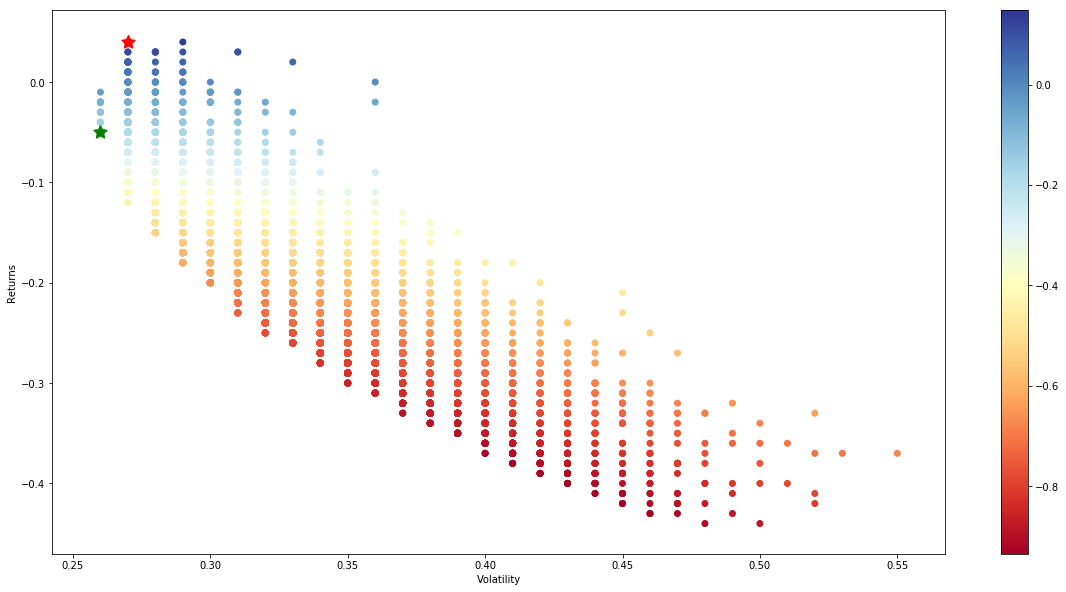

In [67]:
plt.figure(figsize=(20, 10))

num_portfolios = 25000

results = np.zeros((3 + df.columns.size, num_portfolios))

for i in range(num_portfolios):
    weights = np.array(np.random.random(df.columns.size))
    weights /= np.sum(weights)
    
    portfolio_mean = round(np.sum(mean_ret * weights) * 252, 2)
    portfolio_std = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252), 2)
    
    results[0, i] = portfolio_mean
    results[1, i] = portfolio_std
    results[2, i] = results[0, i] / results[1, i]
    
    for j in range(len(weights)):
        results[j + 3, i] = weights[j]
        
df_port = pd.DataFrame(results.T, columns=['ret', 'std', 'sharpe', 'TCS', 'DHFL', 'PNB', 'RAYMOND', 'SUZLON'])

max_sharpe = df_port.loc[df_port['sharpe'].idxmax()]
min_vol = df_port.loc[df_port['std'].idxmin()]

plt.scatter(df_port['std'], df_port['ret'], c=df_port['sharpe'], cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharpe[1], max_sharpe[0], marker=(5, 1, 0), color='r', s=200)
plt.scatter(min_vol[1], min_vol[0], marker=(5, 1, 0), color='g', s=200)